## Практика 10


### Задание 1. Выгрузка данных и их предобработка

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import plotly.express as px
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [67]:
data = pd.read_csv('smoke_detection_iot.csv')
data.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [69]:
data.isna().sum()

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [70]:
data = data.drop(data.columns[[0,1]], axis=1)
# data = data.iloc[:500]
data = data.sample(n=1000)
data.drop_duplicates(inplace=True)
data = data.reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature[C]  1000 non-null   float64
 1   Humidity[%]     1000 non-null   float64
 2   TVOC[ppb]       1000 non-null   int64  
 3   eCO2[ppm]       1000 non-null   int64  
 4   Raw H2          1000 non-null   int64  
 5   Raw Ethanol     1000 non-null   int64  
 6   Pressure[hPa]   1000 non-null   float64
 7   PM1.0           1000 non-null   float64
 8   PM2.5           1000 non-null   float64
 9   NC0.5           1000 non-null   float64
 10  NC1.0           1000 non-null   float64
 11  NC2.5           1000 non-null   float64
 12  CNT             1000 non-null   int64  
 13  Fire Alarm      1000 non-null   int64  
dtypes: float64(8), int64(6)
memory usage: 109.5 KB


### Задание 2. Гистограмма, показывающая баланс классов

In [71]:
target = data['Fire Alarm']
predictors = data.drop('Fire Alarm', axis=1)

<AxesSubplot: xlabel='Fire Alarm', ylabel='Count'>

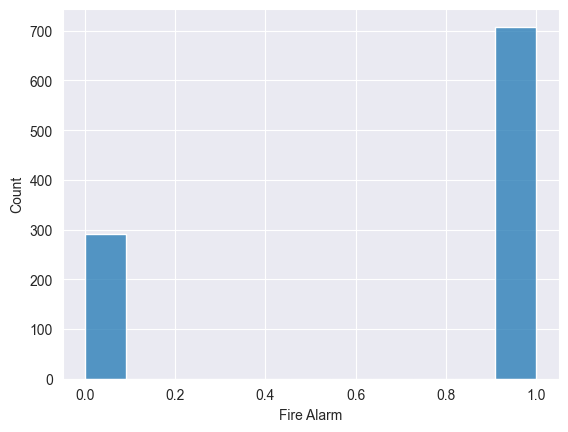

In [72]:
sns.histplot(target)

### Задание 3. Разбиение выборки на тренировочную и тестовую

In [73]:
x_train, x_test, y_train, y_test = train_test_split(predictors, target, train_size=0.8, shuffle=True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 13), (200, 13), (800,), (200,))

### Задание 4. Применение алгоритмов классификации

#### Логистическая регрессия

In [74]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
y_predict

c:\users\artyom\pycharmprojects\python_7_sem\venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



array([1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1], dtype=int64)

In [75]:
fig = px.imshow(confusion_matrix(y_test, y_predict), text_auto=True)
fig.update_layout(xaxis_title = 'Target', yaxis_title = 'Prediction')

#### SVM

In [76]:
param_kernel = ('linear', 'sigmoid' , 'rbf', 'poly')
parameters = {'kernel': param_kernel}
model = SVC()
grid_search_svm = GridSearchCV(estimator=model, param_grid=parameters, cv=6)
grid_search_svm.fit(x_train, y_train)

GridSearchCV(cv=6, estimator=SVC(),
             param_grid={'kernel': ('linear', 'sigmoid', 'rbf', 'poly')})

In [77]:
best_model = grid_search_svm.best_estimator_
best_model.kernel

'linear'

In [78]:
svm_preds = best_model.predict(x_test)

In [79]:
fig = px.imshow(confusion_matrix(y_test, svm_preds), text_auto=True)
fig.update_layout(xaxis_title = 'Target', yaxis_title = 'Prediction')

#### KNN

In [80]:
number_of_neighbors = np.arange(3, 10, 25)
model_KNN = KNeighborsClassifier()
params = {'n_neighbors': number_of_neighbors}
grid_search = GridSearchCV(estimator=model_KNN, param_grid=params, cv=6)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=6, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([3])})

In [81]:
grid_search.best_score_

0.993734335839599

In [82]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=3)

In [83]:
knn_preds = grid_search.predict(x_test)

In [84]:
fig = px.imshow(confusion_matrix(y_test, knn_preds), text_auto=True)
fig.update_layout(xaxis_title = 'Target', yaxis_title = 'Prediction')

### Задание 5. Сравнение результатов классификации

In [85]:
accuracy_score(y_test, y_predict), accuracy_score(y_test, svm_preds), accuracy_score(y_test, knn_preds)

(0.99, 0.99, 1.0)

In [86]:
precision_score(y_test, y_predict), precision_score(y_test, svm_preds), precision_score(y_test, knn_preds)

(1.0, 1.0, 1.0)

In [87]:
recall_score(y_test, y_predict), recall_score(y_test, svm_preds), recall_score(y_test, knn_preds)

(0.9862068965517241, 0.9862068965517241, 1.0)

In [88]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        55
           1       1.00      0.99      0.99       145

    accuracy                           0.99       200
   macro avg       0.98      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



In [89]:
print(classification_report(y_test, svm_preds))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        55
           1       1.00      0.99      0.99       145

    accuracy                           0.99       200
   macro avg       0.98      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



In [90]:
print(classification_report(y_test, knn_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00       145

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

